In [1]:
#mahir shadid

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"F:\DATA SCience\codsoft\task-1\archive\tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Feature Selection

# PassengerID, name, ticket, cabin of people can't output anyone's death

data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
data['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [9]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [11]:
data['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

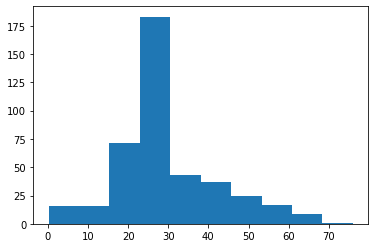

In [12]:
import matplotlib.pyplot as plt

plt.hist(data['Age'])
plt.show() 

In [13]:
# The variation in age is broad, grouping them is the better approach

age_group = [
    'below 15',
    '15 to 30',
    '31 to 45',
    '46 to 60',
    'above 60',
]

def label_age(row):
    if row['Age'] < 15:
        return age_group[0]
    elif row['Age'] < 31:
        return age_group[1]
    elif row['Age'] < 46:
        return age_group[2]
    elif row['Age'] < 61:
        return age_group[3]
    elif row['Age'] > 60:
        return age_group[4]

data['age_group'] = data.apply(lambda row: label_age(row), axis=1)
data.drop('Age', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age_group
0,0,3,male,0,0,7.8292,Q,31 to 45
1,1,3,female,1,0,7.0000,S,46 to 60
2,0,2,male,0,0,9.6875,Q,above 60
3,0,3,male,0,0,8.6625,S,15 to 30
4,1,3,female,1,1,12.2875,S,15 to 30


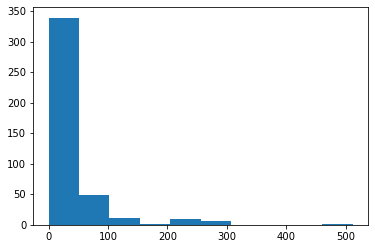

In [14]:
plt.hist(data['Fare'])
plt.show() 

In [15]:
# Grouping the Fare is also a better approach

fare_group = [
    'below 50',
    '50 to 100',
    '101 to 150',
    '151 to 200',
    '201 to 250',
    '251 to 300',
    'above 300',
]

def label_fare(row):
    if row['Fare'] < 50:
        return fare_group[0]
    elif row['Fare'] < 101:
        return fare_group[1]
    elif row['Fare'] < 151:
        return fare_group[2]
    elif row['Fare'] < 201:
        return fare_group[3]
    elif row['Fare'] < 251:
        return fare_group[4]
    elif row['Fare'] < 301:
        return fare_group[5]
    elif row['Fare'] > 300:
        return fare_group[6]

data['fare_group'] = data.apply(lambda row: label_fare(row), axis=1)
data.drop('Fare', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_group,fare_group
0,0,3,male,0,0,Q,31 to 45,below 50
1,1,3,female,1,0,S,46 to 60,below 50
2,0,2,male,0,0,Q,above 60,below 50
3,0,3,male,0,0,S,15 to 30,below 50
4,1,3,female,1,1,S,15 to 30,below 50


In [16]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
age_group     0
fare_group    0
dtype: int64

In [17]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

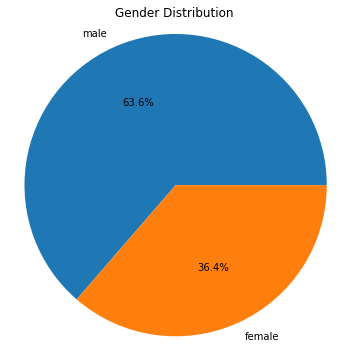

In [18]:
gender_counts = data['Sex'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

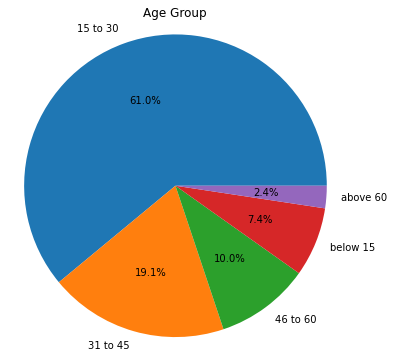

In [19]:
age_counts = data['age_group'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Group')
plt.axis('equal') 
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)

In [21]:
x = data.drop('Survived',axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=11,shuffle=True)

In [22]:
# Hovering to my favourite GridSearch approach

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = []
models.append(['XGBClassifier',XGBClassifier()])
models.append(['SVM',SVC()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])

In [23]:
grid_models = [
    (SVC(), [{'C': [0.1, 1]}]),
    (DecisionTreeClassifier(), [{'random_state': [0]}]),
    (RandomForestClassifier(), [{'n_estimators': [50, 10]}]),
    (XGBClassifier(), [{'n_estimators': [50, 10]}]),
]

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


best_accuracy = 0
best_params = {}
best_model = None

for i, j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid=j, scoring='accuracy', cv=10)
    grid.fit(xtrain, ytrain)
    accuracy = grid.best_score_
    params = grid.best_params_
    print('{}: \n Best Accuracy: {:.0f} %'.format(i.__class__.__name__, accuracy * 100))
    print('Best Params: {}'.format(params))
    print('')
    print('-' * 25)
    print('')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = i

# Create the best model with the best hyperparameters
best_model = best_model.set_params(**best_params)

# Train the best model on the training data
best_model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = best_model.predict(xtest)

# Calculate evaluation metrics
acc = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted', zero_division=0)
recall = recall_score(ytest, y_pred, average='weighted', zero_division=0)
f1 = f1_score(ytest, y_pred, average='weighted', zero_division=0)


# Print evaluation metrics
print("Best Accuracy:", best_accuracy)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

SVC: 
 Best Accuracy: 99 %
Best Params: {'C': 1}

-------------------------

DecisionTreeClassifier: 
 Best Accuracy: 100 %
Best Params: {'random_state': 0}

-------------------------

RandomForestClassifier: 
 Best Accuracy: 100 %
Best Params: {'n_estimators': 50}

-------------------------

XGBClassifier: 
 Best Accuracy: 100 %
Best Params: {'n_estimators': 50}

-------------------------

Best Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
